# Data Analysis Using Numpy/Pandas - Baseball Dataset

## Key Points
* Correlation between Team Perfromace Metrics
* Characteristics of Highly Paid Players

**Note**: For ease of use the data used for anaylsis was from the year 2011 and above

In [1]:
#Common Library Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#For better plotting
import seaborn as sns
#To print all graphs inline
%matplotlib inline  

In [2]:
#To run all output blocks of the code in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#Loading all Input Data
teamInfo = pd.read_csv("./DataSet/Teams.csv")
playerInfo = pd.read_csv("./DataSet/Master.csv")
salaryInfo = pd.read_csv("./DataSet/Salaries.csv")
seriesPostInfo = pd.read_csv("./DataSet/SeriesPost.csv")
battingInfo = pd.read_csv("./DataSet/Batting.csv")
battingPostInfo = pd.read_csv("./DataSet/BattingPost.csv")
pitchingInfo = pd.read_csv("./DataSet/Pitching.csv")
pitchingPostInfo = pd.read_csv("./DataSet/PitchingPost.csv")
AllstarInfo = pd.read_csv("./DataSet/AllstarFull.csv")

## Statistics Used For Analysis

I am a newbie to the terms and stats used in baseball sport as I don't follow the sport very much. I have decided to stick to the basics. Inspired by the **Monyeball theory** I have used the following stats for pitchers and batter to perform my analysis.  

The following metrics were used to caluclate the metrics below

* Rank: Position in final standings
* R: Runs scored
* RA: Opponents runs scored
* G: Games played
* W: Wins
* H: Hits by batters
* BB: Walks by batters
* HBP: Batters hit by pitch
* AB: At bats
* SF: Sacrifice flies
* HR: Homeruns by batters
* 2B: Doubles
* 3B: Triples

## Batters:
The **Batting Average [BA]** is defined by the number of hits divided by at bats. It can be calculated using the formula below:

* BA = H/AB

**On-base Percentage** is a measure of how often a batter reaches base for any reason other than a fielding error, fielder's choice, dropped/uncaught third strike, fielder's obstruction, or catcher's interference. It can be calculated using the formula below:

* OBP = (H+BB+HBP)/(AB+BB+HBP+SF)

**Slugging Percentage** is a measure of the power of a hitter. It can ve calculated using the formula below:

* SLG = H+2B+(2*3B)+(3*HR)/AB

## Pitchers:
**Earned Run Average (ERA)** - Already provided in the dataset.

## Monyeball Experiment Analysis:
Based on the analysis, a good strategy for recruiting batters would focus on targeting undervalued players with high OBP and SLG. Although BA and OBP have a positive correlation, there were some players that have high OBP and SLG, and relatively small BA. These players were undervalued by the market, and were the target for recruitment.

## Data Cleanup
The team ID values from the dataset **Salary** and **Teams** is not consistent. The team ID is cleaned up to make it consistent. The function **setTeamID()** function is used to do the cleanup.

In [4]:
def setTeamID(data):
        data['teamID'].replace('CHA', 'CHW',inplace=True)
        data['teamID'].replace('CHN', 'CHC',inplace=True)
        data['teamID'].replace('LAN', 'LAD',inplace=True)
        data['teamID'].replace('NYA', 'NYM',inplace=True)
        data['teamID'].replace('KCA', 'KCR',inplace=True)
        data['teamID'].replace('NYN', 'NYY',inplace=True)
        data['teamID'].replace('SDN', 'SDP',inplace=True)
        data['teamID'].replace('SFN', 'SFG',inplace=True)
        data['teamID'].replace('SLN', 'STL',inplace=True)
        data['teamID'].replace('TBA', 'TBR',inplace=True)
        data['teamID'].replace('WAS', 'WSN',inplace=True)

In [5]:
#Cleaning Up Data for Team dataset
setTeamID(teamInfo)

In [6]:
#Five Year Dataset
teamLastFiveYrs = teamInfo[teamInfo['yearID'] > 2011]
teamInfo2016 = teamInfo[teamInfo['yearID'] == 2016]
#Five Year Dataset
salaryInfo2016 = salaryInfo[salaryInfo['yearID'] == 2016]
salaryLastFiveYrs = salaryInfo[salaryInfo['yearID'] > 2011]

In [7]:
teamInfo2016 = teamInfo2016[['yearID','teamID','name','park','lgID','divID','Rank', 'R', 'RA', 'G', 'W', 'H', 'BB', 'HBP', 'AB', 'SF', 'HR', '2B', '3B', 'ERA']]
teamLastFiveYrs = teamLastFiveYrs[['yearID','teamID','name','park','lgID','divID','Rank', 'R', 'RA', 'G', 'W', 'H', 'BB', 'HBP', 'AB', 'SF', 'HR', '2B', '3B', 'ERA']]

## Metrics Calculation
The function **calulateMetrics()** will calculate the following metircs
* Batting Average
* On-Base Percentage
* Sluggish Percentage

In [8]:
def calulateMetrics(data):
    data['BA'] = data['H']/data['AB']
    data['OBP'] = (data['H'] + data['BB'] + data['HBP']) / (data['AB'] + data['BB'] + data['HBP'] + data['SF'])
    data['SLG'] = (data['H'] + data['2B'] + (2*data['3B']) + (3*data['HR'])) / data['AB']
    #Winning Percentage [WP]
    data['WP'] = data['W']/data['G']
    #On Base Plus Slugging [OPS] - On Base Percentage + Slugging Average
    data['OPS'] = data['OBP'] + data['SLG']
    return data
    

In [9]:
teamInfo2016 = calulateMetrics(teamInfo2016)
teamLastFiveYrs = calulateMetrics(teamLastFiveYrs)  

In [10]:
def getDataByLeague(data, league):
    return data[data['lgID'] == league]

In [11]:
#Split the Team Info by League AL & NL
teamInfoAL2016 = getDataByLeague(teamInfo2016, 'AL')
teamInfoNL2016 = getDataByLeague(teamInfo2016, 'NL')
teamInfoALFiveYrs = getDataByLeague(teamLastFiveYrs, 'AL')
teamInfoNLFiveYrs = getDataByLeague(teamLastFiveYrs, 'NL')

## Calculating Descriptive Statistics

In [12]:
#Calculating League Stats
teamInfoNL2016Stats = teamInfoNL2016[['R','BA','OBP','SLG','OPS','HR','ERA']].describe()
teamInfoNL5YrsStats = teamInfoNLFiveYrs[['R','BA','OBP','SLG','OPS','HR','ERA']].describe()
teamInfoAL2016Stats = teamInfoAL2016[['R','BA','OBP','SLG','OPS','HR','ERA']].describe()
teamInfoAL5YrsStats = teamInfoALFiveYrs[['R','BA','OBP','SLG','OPS','HR','ERA']].describe()

## League Stats for the year 2016 and for the last five years

**National League[NL] Stats**
* Year 2016
* Last Five Years [2011 & Above]

In [13]:
#National League Stats
teamInfoNL2016Stats.iloc[1]
teamInfoNL5YrsStats.iloc[1]

R      718.266667
BA       0.253744
OBP      0.321912
SLG      0.411938
OPS      0.733850
HR     177.133333
ERA      4.165333
Name: mean, dtype: float64

R      671.434211
BA       0.252215
OBP      0.316415
SLG      0.395997
OPS      0.712412
HR     151.947368
ERA      3.883947
Name: mean, dtype: float64

**American League[AL] Stats**
* Year 2016
* Last Five Years [2011 & Above]

In [14]:
#American League Stats
teamInfoAL2016Stats.iloc[1]
teamInfoAL5YrsStats.iloc[1]

R      731.333333
BA       0.256792
OBP      0.320978
SLG      0.422620
OPS      0.743598
HR     196.866667
ERA      4.203333
Name: mean, dtype: float64

R      708.040541
BA       0.255227
OBP      0.318814
SLG      0.407943
OPS      0.726757
HR     172.324324
ERA      4.018378
Name: mean, dtype: float64

## Calculating the Co-relation between Input Variables

* **Runs Scored Vs On-Base Percentage** [National League, 2016]

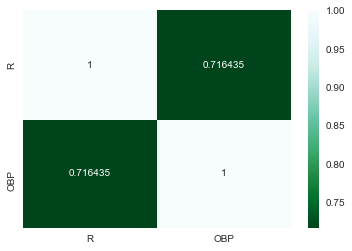

In [15]:
sns.heatmap(teamInfoNL2016[['R', 'OBP']].corr(), annot=True, fmt="g", cmap='BuGn_r')

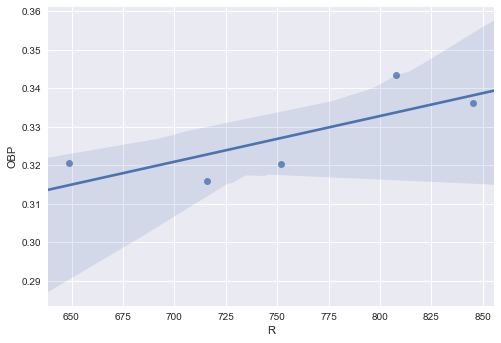

In [16]:
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x=teamInfoNL2016['R'].head(), y=teamInfoNL2016['OBP'].head())

* **Runs Scored Vs Sluggish Percentage** [American League, 2016]

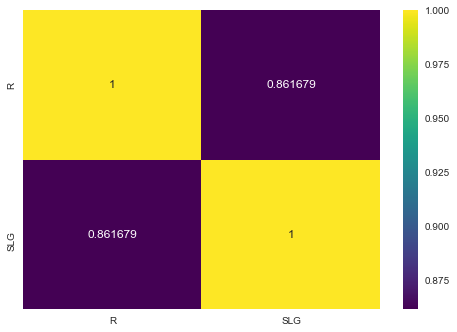

In [17]:
sns.heatmap(teamInfoAL2016[['R', 'SLG']].corr(), annot=True, fmt="g", cmap='viridis')

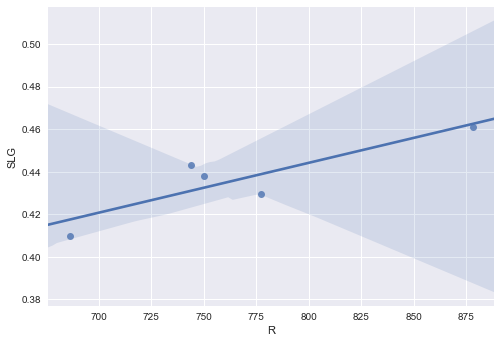

In [18]:
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x=teamInfoAL2016['R'].head(), y=teamInfoAL2016['SLG'].head())

## Result:
* Both **On-Base Percentage** and **Sluggish Percentage** have a **strong co-relation** with **Runs Scored**
* Although both the metrics have a strong co-relation **Sluggish Percentgae** is the **strongest** of the both

## League Player Salary and Batting Metrics 

The following analysis will look into the salary cap and the perfromance metrics of the players in National and American League

# Batting Metrics

In [19]:
#Cleaning Up Data for Team dataset
setTeamID(battingInfo)
#Five Year Dataset
battingFiveYrs = battingInfo[battingInfo['yearID'] > 2011]
batting2016 = battingInfo[battingInfo['yearID'] == 2016]
batting2016 = batting2016[['yearID', 'teamID', 'lgID', 'playerID','R','G', 'H', 'BB', 'HBP', 'AB', 'SF', 'HR', '2B', '3B']]
battingFiveYrs = battingFiveYrs[['yearID', 'teamID', 'lgID', 'playerID','R','G', 'H', 'BB', 'HBP', 'AB', 'SF', 'HR', '2B', '3B']]

In [20]:
def calculateBattingMetrics(data):
    data['BA'] = data['H']/data['AB']
    data['OBP'] = (data['H'] + data['BB'] + data['HBP']) / (data['AB'] + data['BB'] + data['HBP'] + data['SF'])
    data['SLG'] = (data['H'] + data['2B'] + (2*data['3B']) + (3*data['HR'])) / data['AB']
    #HR Ratio [HRRation]
    data['HRRatio'] = data['HR']/data['AB']
    #On Base Plus Slugging [OPS] - On Base Percentage + Slugging Average
    data['OPS'] = data['OBP'] + data['SLG']
    return data

In [21]:
batting2016 = calculateBattingMetrics(batting2016).fillna(0)
battingFiveYrs = calculateBattingMetrics(battingFiveYrs).fillna(0)

In [22]:
def AddPlayerNames(data):
    return pd.merge(playerInfo[['nameFirst','nameLast','nameGiven','bats','throws','playerID']], data, on=['playerID'], how='inner')

In [23]:
def getTeamInfo(data):
    setTeamID(teamInfo)
    setTeamID(data)
    return pd.merge(teamLastFiveYrs[['name','teamID']], data, on=['teamID'], how='inner')

In [24]:
SalariesBy2016 = salaryInfo2016.groupby(['playerID', 'yearID']).sum().reset_index()
SalariesBy5Yrs = salaryLastFiveYrs.groupby(['playerID', 'yearID']).sum().reset_index()

In [25]:
MergeBattingInfo2016 = pd.merge(batting2016, SalariesBy2016, on=['yearID', 'playerID'], how='inner').fillna(0)
MergeBattingInfo5Yrs = pd.merge(battingFiveYrs, SalariesBy5Yrs, on=['yearID', 'playerID'], how='inner').fillna(0)
ALTopPlayers2016 = getDataByLeague(MergeBattingInfo2016, 'AL')
ALTopPlayers5Yrs = getDataByLeague(MergeBattingInfo5Yrs, 'AL')
NLTopPlayers2016 = getDataByLeague(MergeBattingInfo2016, 'NL')
NLTopPlayers5Yrs = getDataByLeague(MergeBattingInfo5Yrs, 'NL')
NL2016withNames = AddPlayerNames(NLTopPlayers2016)
NL5YrswithNames = AddPlayerNames(NLTopPlayers5Yrs)
AL2016withNames = AddPlayerNames(ALTopPlayers2016)
AL5YrswithNames = AddPlayerNames(ALTopPlayers5Yrs)
NLTopPlayers = NL5YrswithNames[['nameFirst','nameLast','nameGiven','bats','throws','playerID','yearID','teamID','lgID','R','BA','OBP','SLG','OPS','HR','salary']].sort_values('salary', ascending=False).head()
ALTopPlayers = AL5YrswithNames[['nameFirst','nameLast','nameGiven','bats','throws','playerID','yearID','teamID','lgID','R','BA','OBP','SLG','OPS','HR','salary']].sort_values('salary', ascending=False).head()
#sort_values('salary', ascending=False)

In [26]:
AL5YrswAvg = AL5YrswithNames[['yearID','R','BA','OBP','SLG','OPS','HR']].groupby(['yearID']).mean().reset_index()
AL5YrswAvg.columns = ['yearID','RAvg','BAAvg','OBPAvg','SLGAvg','OPSAvg','HRAvg']
AL5Yrsw = pd.merge(AL5YrswithNames,AL5YrswAvg, on='yearID', how='inner')
AL5Yr = AL5Yrsw[['nameFirst','nameLast','playerID', 'teamID','yearID','lgID','R','RAvg','BA','BAAvg','OBP','OBPAvg','SLG','SLGAvg','OPSAvg','HR','HRAvg', 'salary']]
AL5Yr.sort_values('salary', ascending=False).head()

,nameFirst,nameLast,playerID,teamID,yearID,lgID,R,RAvg,BA,BAAvg,OBP,OBPAvg,SLG,SLGAvg,OPSAvg,HR,HRAvg,salary
1638,David,Price,priceda01,BOS,2016,AL,0,21.789593,0.000000,0.138821,0.090909,0.176949,0.000000,0.219443,0.396392,0,6.006787,30000000
330,Alex,Rodriguez,rodrial01,NYM,2012,AL,74,21.025701,0.272138,0.144395,0.353497,0.178444,0.429806,0.218112,0.396556,18,5.336449,30000000
2130,Alex,Rodriguez,rodrial01,NYM,2013,AL,21,20.534368,0.243590,0.135997,0.348066,0.175911,0.423077,0.207858,0.381552,7,4.988914,29000000
1303,Justin,Verlander,verlaju01,DET,2015,AL,0,19.765591,0.000000,0.140435,0.000000,0.180059,0.000000,0.215154,0.390912,0,4.933333,28000000
1383,Miguel,Cabrera,cabremi01,DET,2016,AL,92,21.789593,0.315966,0.138821,0.393225,0.176949,0.563025,0.219443,0.396392,38,6.006787,28000000


In [27]:
NL5YrswAvg = NL5YrswithNames[['yearID','R','BA','OBP','SLG','OPS','HR']].groupby(['yearID']).mean().reset_index()
NL5YrswAvg.columns = ['yearID','RAvg','BAAvg','OBPAvg','SLGAvg','OPSAvg','HRAvg']
NL5Yrsw = pd.merge(NL5YrswithNames,NL5YrswAvg, on='yearID', how='inner')
NL5Yr = NL5Yrsw[['nameFirst','nameLast','playerID', 'teamID','yearID','lgID','R','RAvg','BA','BAAvg','OBP','OBPAvg','SLG','SLGAvg','OPSAvg','HR','HRAvg', 'salary']]
NL5Yr.sort_values('salary', ascending=False).head()

,nameFirst,nameLast,playerID,teamID,yearID,lgID,R,RAvg,BA,BAAvg,OBP,OBPAvg,SLG,SLGAvg,OPSAvg,HR,HRAvg,salary
1577,Clayton,Kershaw,kershcl01,LAD,2016,NL,2,21.234513,0.173913,0.153656,0.191489,0.200117,0.195652,0.235696,0.431387,0,5.269912,33000000
2044,Clayton,Kershaw,kershcl01,LAD,2015,NL,2,19.169978,0.126761,0.155054,0.162162,0.196506,0.154930,0.234265,0.428564,0,4.357616,32571000
1520,Zack,Greinke,greinza01,ARI,2016,NL,4,21.234513,0.211538,0.153656,0.245614,0.200117,0.230769,0.235696,0.431387,0,5.269912,31799030
1434,Yoenis,Cespedes,cespeyo01,NYY,2016,NL,72,21.234513,0.279749,0.153656,0.353591,0.200117,0.530271,0.235696,0.431387,31,5.269912,27328046
1071,Zack,Greinke,greinza01,LAD,2014,NL,5,19.556054,0.200000,0.156633,0.261538,0.203101,0.350000,0.226639,0.425255,1,4.181614,26000000


# Pitching Metrics

In [28]:
pitchInfo = pitchingInfo[pitchingInfo['yearID'] > 2011]
pitchInfo = pitchInfo[['yearID', 'teamID','lgID' ,'playerID', 'W', 'L', 'G', 'BAOpp', 'ERA', 'R','CG', 'SHO','SV', 'H']].fillna(0)

In [29]:
setTeamID(pitchInfo)
pitchPlayer = pd.merge(pitchInfo, SalariesBy5Yrs, on=['yearID', 'playerID'], how='inner').fillna(0)
ALTopPitchers = pitchPlayer[pitchPlayer['lgID']=='AL']
NLTopPitchers = pitchPlayer[pitchPlayer['lgID']=='NL']
NLTopPitcherswithNames = pd.merge(playerInfo[['nameFirst','nameLast','nameGiven','playerID']], NLTopPitchers, on=['playerID'], how='inner').fillna(0)
ALTopPitcherswithNames = pd.merge(playerInfo[['nameFirst','nameLast','nameGiven','playerID']], ALTopPitchers, on=['playerID'], how='inner').fillna(0)
NLTopPitcherswithNames.sort_values('salary', ascending=False).head()
ALTopPitcherswithNames.sort_values('salary', ascending=False).head()

,nameFirst,nameLast,nameGiven,playerID,yearID,teamID,lgID,W,L,G,BAOpp,ERA,R,CG,SHO,SV,H,salary
542,Clayton,Kershaw,Clayton Edward,kershcl01,2016,LAD,NL,12,4,21,0.184,1.69,31,3,3,0,97,33000000
541,Clayton,Kershaw,Clayton Edward,kershcl01,2015,LAD,NL,16,7,33,0.194,2.13,62,4,3,0,163,32571000
405,Zack,Greinke,Donald Zachary,greinza01,2016,ARI,NL,13,7,26,0.262,4.37,80,1,1,0,161,31799030
403,Zack,Greinke,Donald Zachary,greinza01,2014,LAD,NL,17,8,32,0.247,2.71,69,0,0,0,190,26000000
404,Zack,Greinke,Donald Zachary,greinza01,2015,LAD,NL,19,3,32,0.187,1.66,43,1,0,0,148,25000000


,nameFirst,nameLast,nameGiven,playerID,yearID,teamID,lgID,W,L,G,BAOpp,ERA,R,CG,SHO,SV,H,salary
786,David,Price,David Taylor,priceda01,2016,BOS,AL,17,9,35,0.258,3.99,106,2,0,0,227,30000000
1033,Justin,Verlander,Justin Brooks,verlaju01,2015,DET,AL,5,8,20,0.229,3.38,56,1,1,0,113,28000000
1034,Justin,Verlander,Justin Brooks,verlaju01,2016,DET,AL,16,9,34,0.207,3.04,81,2,0,0,171,28000000
421,Felix,Hernandez,Felix Abraham,hernafe02,2016,SEA,AL,11,8,25,0.239,3.82,76,0,0,0,138,25857143
420,Felix,Hernandez,Felix Abraham,hernafe02,2015,SEA,AL,18,9,31,0.240,3.53,80,2,2,0,180,24857000


In [30]:
NL5YrswAvg = NLTopPitcherswithNames[['yearID','ERA']].groupby(['yearID']).mean().reset_index()
NL5YrswAvg.columns = ['yearID','ERAvg']
NL5Yrsw = pd.merge(NLTopPitcherswithNames,NL5YrswAvg, on='yearID', how='inner')
NL5Yr = NL5Yrsw[['nameFirst','nameLast','playerID', 'teamID','yearID','lgID','W', 'L', 'G', 'BAOpp', 'ERA','ERAvg', 'salary']]
NL5Yr.sort_values('salary', ascending=False).head()

,nameFirst,nameLast,playerID,teamID,yearID,lgID,W,L,G,BAOpp,ERA,ERAvg,salary
1007,Clayton,Kershaw,kershcl01,LAD,2016,NL,12,4,21,0.184,1.69,4.612265,33000000
801,Clayton,Kershaw,kershcl01,LAD,2015,NL,16,7,33,0.194,2.13,3.984934,32571000
979,Zack,Greinke,greinza01,ARI,2016,NL,13,7,26,0.262,4.37,4.612265,31799030
531,Zack,Greinke,greinza01,LAD,2014,NL,17,8,32,0.247,2.71,4.236771,26000000
1016,Jon,Lester,lestejo01,CHC,2016,NL,19,5,32,0.211,2.44,4.612265,25000000


In [31]:
AL5YrswAvg = ALTopPitcherswithNames[['yearID','ERA']].groupby(['yearID']).mean().reset_index()
AL5YrswAvg.columns = ['yearID','ERAvg']
AL5Yrsw = pd.merge(ALTopPitcherswithNames,AL5YrswAvg, on='yearID', how='inner')
AL5Yr = AL5Yrsw[['nameFirst','nameLast','playerID', 'teamID','yearID','lgID','W', 'L', 'G', 'BAOpp', 'ERA','ERAvg', 'salary']]
AL5Yr.sort_values('salary', ascending=False).head()

,nameFirst,nameLast,playerID,teamID,yearID,lgID,W,L,G,BAOpp,ERA,ERAvg,salary
799,David,Price,priceda01,BOS,2016,AL,17,9,35,0.258,3.99,4.381379,30000000
854,Justin,Verlander,verlaju01,DET,2016,AL,16,9,34,0.207,3.04,4.381379,28000000
632,Justin,Verlander,verlaju01,DET,2015,AL,5,8,20,0.229,3.38,4.279750,28000000
727,Felix,Hernandez,hernafe02,SEA,2016,AL,11,8,25,0.239,3.82,4.381379,25857143
496,Felix,Hernandez,hernafe02,SEA,2015,AL,18,9,31,0.240,3.53,4.279750,24857000


# Series Winners

In [32]:
seriesFiveYrs = seriesPostInfo[seriesPostInfo['yearID'] > 2005]
series2016 = seriesPostInfo[seriesPostInfo['yearID'] == 2016]
seriesFiveYrs=seriesFiveYrs.rename(columns = {'teamIDwinner':'teamID'})
setTeamID(seriesFiveYrs)
seriesFiveYrs=seriesFiveYrs.rename(columns = {'teamID':'teamIDwinner'})
seriesFiveYrs=seriesFiveYrs.rename(columns = {'teamIDloser':'teamID'})
setTeamID(seriesFiveYrs)
seriesFiveYrs=seriesFiveYrs.rename(columns = {'teamID':'teamIDloser'})
WSwinners = seriesFiveYrs[seriesFiveYrs['round'] == 'WS']
WSwinners[WSwinners['lgIDwinner'] == 'NL'].head()
WSwinners[WSwinners['lgIDwinner'] == 'AL'].head()

,yearID,round,teamIDwinner,lgIDwinner,teamIDloser,lgIDloser,wins,losses,ties
235,2006,WS,STL,NL,DET,AL,4,1,0
249,2008,WS,PHI,NL,TBR,AL,4,1,0
263,2010,WS,SFG,NL,TEX,AL,4,1,0
270,2011,WS,STL,NL,TEX,AL,4,3,0
279,2012,WS,SFG,NL,DET,AL,4,0,0


,yearID,round,teamIDwinner,lgIDwinner,teamIDloser,lgIDloser,wins,losses,ties
242,2007,WS,BOS,AL,COL,NL,4,0,0
256,2009,WS,NYM,AL,PHI,NL,4,2,0
288,2013,WS,BOS,AL,STL,NL,4,3,0
306,2015,WS,KCR,AL,NYY,NL,4,1,0


## Analysis
The **highly paid** players have the following features
* The top players in both NL and AL are all ptichers
* The perfromance of the players are way above the league average
* Team having higly paid players have made to the post season

References:
* https://www.pinstripealley.com/2010/12/23/1892608/baseball-statistics-and-acronyms-explained
* https://pandas.pydata.org/pandas-docs/stable/visualization.html
* https://www.baseball-reference.com/leagues/MLB/2012.shtml
* https://en.wikipedia.org/wiki/Major_League_Baseball_postseason